In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("netflix.csv")
data.head(10)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...


In [3]:
data.info(),data.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


(None, (8807, 12))

In [4]:
data.isna().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [5]:
for i in data.columns:
    print(f"{i} : {data[i].nunique()}")

show_id : 8807
type : 2
title : 8807
director : 4528
cast : 7692
country : 748
date_added : 1767
release_year : 74
rating : 17
duration : 220
listed_in : 514
description : 8775


In [6]:
data.describe(include="object").T

,count,unique,top,freq
show_id,8807,8807,s1,1
type,8807,2,Movie,6131
title,8807,8807,Dick Johnson Is Dead,1
director,6173,4528,Rajiv Chilaka,19
cast,7982,7692,David Attenborough,19
country,7976,748,United States,2818
date_added,8797,1767,"January 1, 2020",109
rating,8803,17,TV-MA,3207
duration,8804,220,1 Season,1793
listed_in,8807,514,"Dramas, International Movies",362


In [7]:
actor_df = pd.DataFrame(
    data["cast"].apply(lambda x: str(x).split(", ")).tolist(),index=data.title
    ).stack().reset_index().drop("level_1",axis=1)
actor_df.columns = ["title","cast"]
actor_df

,title,cast
0,Dick Johnson Is Dead,nan
1,Blood & Water,Ama Qamata
2,Blood & Water,Khosi Ngema
3,Blood & Water,Gail Mabalane
4,Blood & Water,Thabang Molaba
...,...,...
64946,Zubaan,Manish Chaudhary
64947,Zubaan,Meghna Malik
64948,Zubaan,Malkeet Rauni
64949,Zubaan,Anita Shabdish


In [8]:
actor_df["cast"].value_counts().head(20)

nan                  825
Anupam Kher           43
Shah Rukh Khan        35
Julie Tejwani         33
Naseeruddin Shah      32
Takahiro Sakurai      32
Rupa Bhimani          31
Akshay Kumar          30
Om Puri               30
Yuki Kaji             29
Amitabh Bachchan      28
Paresh Rawal          28
Boman Irani           27
Vincent Tong          26
Rajesh Kava           26
Kareena Kapoor        25
Andrea Libman         25
John Cleese           24
Samuel L. Jackson     24
Jigna Bhardwaj        23
Name: cast, dtype: int64

In [9]:
actor_df[actor_df["cast"] == "Anupam Kher"]

,title,cast
1606,C Kkompany,Anupam Kher
1704,Kyaa Kool Hai Hum,Anupam Kher
1718,Kyaa Super Kool Hain Hum,Anupam Kher
1728,Kyo Kii... Main Jhuth Nahin Bolta,Anupam Kher
5985,Silver Linings Playbook,Anupam Kher
15063,Dil,Anupam Kher
18151,Chashme Baddoor,Anupam Kher
18315,Special 26,Anupam Kher
18650,Prem Ratan Dhan Payo,Anupam Kher
18662,Vivah,Anupam Kher


In [10]:
df = data.merge(actor_df,on="title",how="inner").drop("cast_x",axis=1)

# Actor based analysis

1. "Anupam Kher" is the one with most number of films in india
2. Director: David Dhawan was directed 6 movies with Anupam kher
3. Anupam kher acted 40 films in india 3 are international movies
4. Shah rukh khan is the 2 nd actor who acted most movies in netflix
5. Farah khan and karan johar directed 3 movies with shar rukh

In [11]:
df.groupby("cast_y").agg({"title":"nunique"}).sort_values(by="title",ascending=False)

,title
cast_y,
nan,825
Anupam Kher,43
Shah Rukh Khan,35
Julie Tejwani,33
Naseeruddin Shah,32
...,...
Jamie Lee,1
Jamie Kenna,1
Jamie Kaler,1


In [12]:
df[
   (df["cast_y"] == "Anupam Kher") & 
   (df["country"] == "India")
    ].groupby("director").agg({"title":'count'}).sort_values(by="title",ascending=False)

,title
director,
David Dhawan,6
Sooraj R. Barjatya,3
Neeraj Pandey,3
Indra Kumar,2
Sangeeth Sivan,2
Mahesh Bhatt,2
Sachin Yardi,2
Abhinay Deo,1
Rakeysh Omprakash Mehra,1


In [13]:
df[
    (df["cast_y"] == "Shah Rukh Khan") & 
    (df["country"] == "India")
    ].groupby("director").agg({"title":'count'}).sort_values(by="title",ascending=False)

,title
director,
Farah Khan,3
Karan Johar,3
Aziz Mirza,2
Rohit Shetty,2
Rajiv Mehra,2
Mahesh Bhatt,2
Amol Palekar,1
Nikkhil Advani,1
Shashilal K. Nair,1


# Actors outside india

1. Takahiro Sakurai, Yuki Kaji are the top actors with 25+Movies
2. Most of their genre are Animation shows.
3. Those movies all are from japan country
4. We can identify most popular shows in japan was Animation series. 


In [14]:
df[(df["country"] != "India")].groupby("cast_y").agg({"title":'nunique'}).sort_values(by="title",ascending=False).head(10)

,title
cast_y,
nan,793
Takahiro Sakurai,32
Yuki Kaji,29
Julie Tejwani,26
Vincent Tong,26
Andrea Libman,25
Rupa Bhimani,25
Samuel L. Jackson,24
John Cleese,24


In [15]:
df[
    (df["cast_y"] == "Takahiro Sakurai")
    ].groupby("director").agg({"title":'nunique'}).sort_values(by="title",ascending=False)

,title
director,
"Kobun Shizuno, Hiroyuki Seshita",3
Toshiyuki Kubooka,3
"Akiyuki Shinbo, Nobuyuki Takeuchi",1
Hiroyuki Seshita,1


In [16]:
df[
    (df["cast_y"] == "Takahiro Sakurai")
    ].groupby("listed_in").agg({"title":'nunique'}).sort_values(by="title",ascending=False)

,title
listed_in,
"Anime Series, International TV Shows",16
"Action & Adventure, Anime Features, International Movies",6
"Anime Series, International TV Shows, Teen TV Shows",4
"Anime Features, Romantic Movies",1
"Anime Series, Crime TV Shows, International TV Shows",1
"Anime Series, International TV Shows, TV Thrillers",1
"Anime Series, Kids' TV",1
"Anime Series, Teen TV Shows",1
TV Shows,1


In [17]:
df[
    (df["cast_y"] == "Takahiro Sakurai")
    ].groupby("country").agg({"title":'nunique'}).sort_values(by="title",ascending=False)

,title
country,
Japan,29


In [18]:
df.groupby(
    ["cast_y","country"]
    ).agg({"title":'nunique'}).sort_values(by="title",ascending=False).head(20)

title
cast_y            country              
nan               United States     330
                  United Kingdom     68
Anupam Kher       India              40
nan               India              32
Shah Rukh Khan    India              32
Naseeruddin Shah  India              29
Takahiro Sakurai  Japan              29
Yuki Kaji         Japan              28
Amitabh Bachchan  India              28
Akshay Kumar      India              28
Paresh Rawal      India              27
Om Puri           India              26
Kareena Kapoor    India              24
Boman Irani       India              23
Daisuke Ono       Japan              22
Adam Sandler      United States      20
Salman Khan       India              20
Ajay Devgn        India              20
Samuel L. Jackson United States      19
Junichi Suwabe    Japan              19

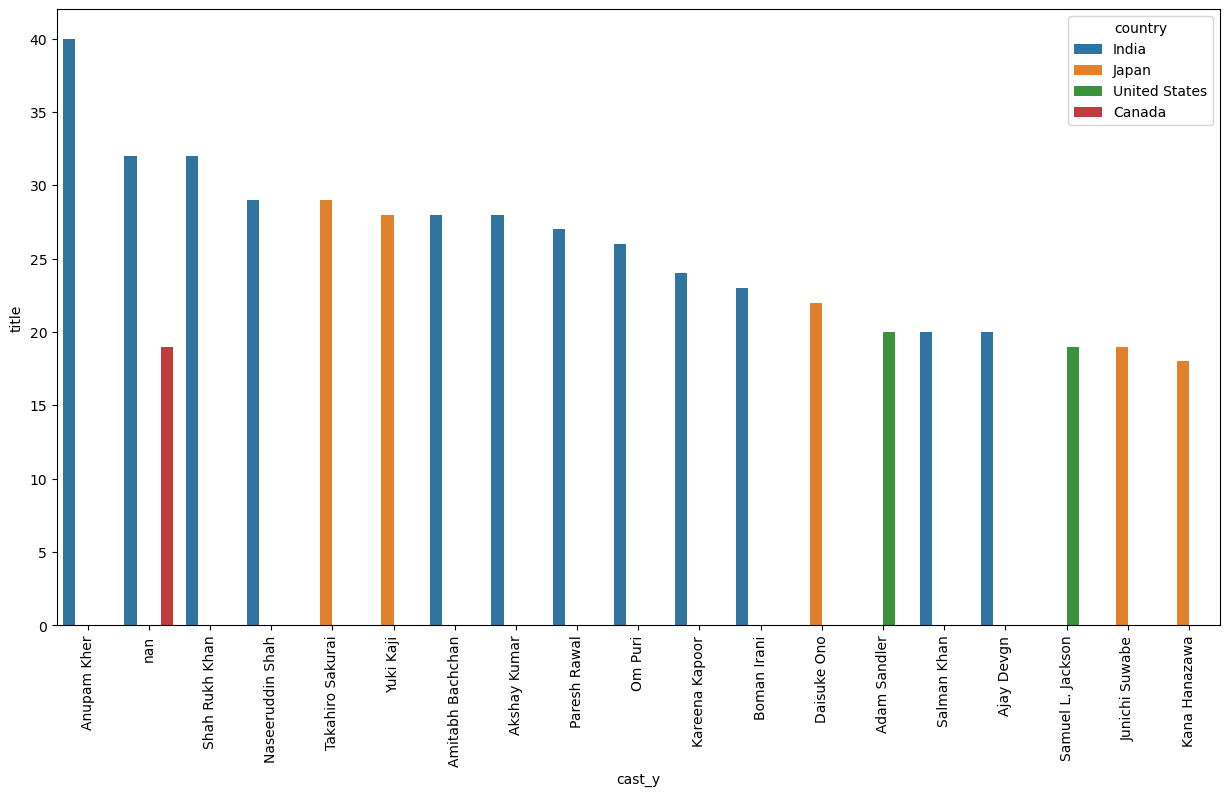

In [19]:
fig = plt.figure(figsize=(15,8))
sns.barplot(
    data=df.groupby(
        ["cast_y","country"]
        ).agg(
            {"title":'nunique'}
            ).sort_values(by="title",ascending=False).reset_index().iloc[2:22],x="cast_y",y="title",hue="country")
plt.xticks(rotation=90)
plt.show()

# Director based analysis

#Movies Director

1. Rajiv Chilaka was 1st popular director. He worked continuously with Julie Tejwani,gna Bhardwaj, Rajesh Kava, Rupa Bhimani, Vatsal Dubey in a 17 unique movies. All his movies was children movies
2. Raúl Campos, Jan Suter was the 2nd popular director, which he done all stand up comedy shows
3. Top comedy shows are directed by Raúl Campos, Jan Suter 18 shows.
4. Suhas Kadav	was the 3rd popular director
5. He also famous for children comedy shows

In [20]:
df[
    df["listed_in"].str.contains("Movies")
    ].groupby(["director","cast_y"]).agg({"title":'nunique'}).sort_values(by="title",ascending=False).head(50)

title
director            cast_y                   
Rajiv Chilaka       Julie Tejwani          17
                    Jigna Bhardwaj         17
                    Rajesh Kava            17
                    Rupa Bhimani           16
                    Vatsal Dubey           15
                    Swapnil                12
                    Mousam                 12
Suhas Kadav         Saurav Chakraborty      8
Toshiya Shinohara   Kumiko Watanabe         7
S.S. Rajamouli      Ramya Krishnan          7
                    Rana Daggubati          7
                    Anushka Shetty          7
                    Sathyaraj               7
Toshiya Shinohara   Houko Kuwashima         7
S.S. Rajamouli      Tamannaah Bhatia        7
Toshiya Shinohara   Satsuki Yukino          7
S.S. Rajamouli      Nassar                  7
Toshiya Shinohara   Kappei Yamaguchi        7
S.S. Rajamouli      Prabhas                 7
Toshiya Shinohara   Koji Tsujitani          7
Omoni Oboli         Omoni Oboli             6
Hakan Algül         Ata Demirer             6
Joey So             Joseph May              6
Cathy Garcia-Molina Joross Gamboa           6
Yılmaz Erdoğan      Yılmaz Erdoğan          6
Wilson Yip          Donnie Yen              5
Toshiya Shinohara   Noriko Hidaka           5
Fernando Ayllón     Ricardo Quevedo         5
Hakan Algül         Salih Kalyon            5
Sooraj R. Barjatya  Salman Khan             5
                    Alok Nath               5
Toshiya Shinohara   Ken Narita              5
Khaled Marei        Ahmed Helmy             5
David Dhawan        Anupam Kher             5
Joey So             Keith Wickham           5
Thierry Donard      Wille Lindberg          5
Cathy Garcia-Molina John Lloyd Cruz         5
Hidenori Inoue      Taichi Saotome          4
Hakan Algül         Demet Akbağ             4
Hernán Zin          nan                     4
Detlev Buck         Michael Maertens        4
Fernando Ayllón     Nelson Polanía          4
Steve Ball          Alessandro Juliani      4
                    Vincent Tong            4
Robert Vince        David DeLuise           4
Masahiko Murata     Junko Takeuchi          4
Suhas Kadav         Mayur Vyas              4
Rathindran R Prasad Vidhu                   4
Prakash Satam       Sonal Kaushal           4
Masahiko Murata     Chie Nakamura           4

In [21]:
df[
    df["director"] == "Rajiv Chilaka"
    ].groupby("listed_in").agg({"title":"nunique"}).sort_values(by="title",ascending=False)

,title
listed_in,
Children & Family Movies,18
"Children & Family Movies, Sports Movies",1


In [22]:
df.groupby("director").agg({"title":"nunique"}).sort_values(by="title",ascending=False)

,title
director,
Rajiv Chilaka,19
"Raúl Campos, Jan Suter",18
Suhas Kadav,16
Marcus Raboy,16
Jay Karas,14
...,...
Jos Humphrey,1
Jose Gomez,1
Jose Javier Reyes,1


In [23]:
df[df["director"] == "Raúl Campos, Jan Suter"].groupby("listed_in").agg({"title":"nunique"})

,title
listed_in,
Stand-Up Comedy,18


In [24]:
df[df["director"] == "Suhas Kadav"].groupby("listed_in").agg({"title":"nunique"})

,title
listed_in,
Children & Family Movies,5
"Children & Family Movies, Comedies",6
"Children & Family Movies, Comedies, Music & Musicals",2
"Children & Family Movies, Music & Musicals",3


#Documentaries Director

1. Vlad Yudin is the director who directed 6 documentaries.
2. Thierry Donard and Wille Lindberg combined in 5 documentaries.

In [25]:
df[
    df["listed_in"].str.contains("Documentaries")
    ].groupby("director").agg({"title":'nunique'}).sort_values(by="title",ascending=False)

,title
director,
Vlad Yudin,6
Thierry Donard,5
Barry Avrich,4
Edward Cotterill,4
Hernán Zin,4
...,...
"Harvey Glazer, Stuart Stone",1
Harvey Lilley,1
Heber Cannon,1


In [26]:
df[
    df["listed_in"].str.contains("Documentaries")
    ].groupby(["director","cast_y"]).agg({"title":'nunique'}).sort_values(by="title",ascending=False)

title
director                          cast_y                 
Thierry Donard                    Wille Lindberg        5
                                  Matt Annetts          4
                                  Jesse Richman         4
Hernán Zin                        nan                   4
Edward Cotterill                  Rachael Stirling      3
...                                                   ...
Heber Cannon                      Rich Froning          1
Harvey Lilley                     Eric Meyers           1
Harvey Glazer, Stuart Stone       nan                   1
Hardik Mehta                      nan                   1
Álvaro Longoria, Gerardo Olivares nan                   1

[1468 rows x 1 columns]

# What type of content is available in different countries?

1. United stated having 3689 movies in netflix, most of the users in netflix are from USA
2. India is in 2nd place of having 1046 movies in netflix
3. Americans most likely to watch movies than series, even in movies also most of them are documentaries
4. They used to watch highly in musical documentaries and second highest was stand-up comedy shows

In [27]:
country_df = pd.DataFrame(
    df["country"].apply(lambda x : str(x).split(", ")
                        ).tolist(),index=df.title).stack().reset_index().drop("level_1",axis=1)
country_df.columns = ["title","country"]

In [28]:
country_df.groupby(["country"]).agg({"title":"nunique"}).sort_values(by="title",ascending=False)

,title
country,
United States,3689
India,1046
nan,831
United Kingdom,804
Canada,445
...,...
Mongolia,1
Somalia,1
Ethiopia,1


# Top Countries count

1. First place we have USA of about 3500+ movies and tv shows
2. Second place we have india of about 1000+movies and tv shows
3. Third place we have international movies and kids movies that all are watching
4. Uk is in fourth place have 500+ movies

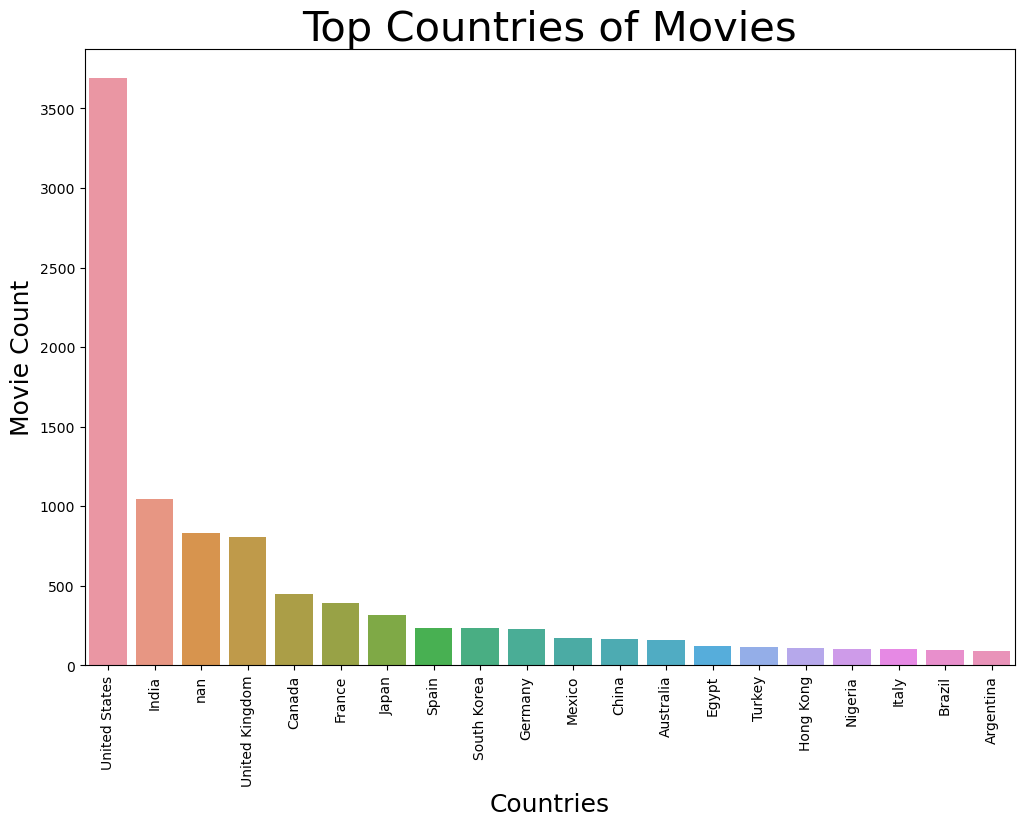

In [29]:
fig = plt.figure(figsize=(12, 8))
sns.barplot(
    data=country_df.groupby(
                        ["country"]).agg({"title":"nunique"}
                        ).sort_values(by="title",ascending=False).reset_index().head(20),x="country",y="title")
plt.xlabel("Countries",fontsize=18)
plt.xticks(rotation=90)
plt.ylabel("Movie Count",fontsize=18)
plt.title("Top Countries of Movies",fontsize=30)
plt.show()

In [30]:
df = df.merge(country_df,on="title",how="inner").drop("country_x",axis=1)

In [31]:
df[
    df["country_y"] == "United States"
    ].groupby(["listed_in"]).agg({"title":"nunique"}).sort_values(by="title",ascending=False).reset_index()

,listed_in,title
0,Documentaries,288
1,Stand-Up Comedy,210
2,"Children & Family Movies, Comedies",146
3,Kids' TV,119
4,Dramas,115
...,...,...
369,"Crime TV Shows, Spanish-Language TV Shows, TV ...",1
370,"Crime TV Shows, TV Action & Adventure, TV Sci-...",1
371,"Crime TV Shows, TV Comedies, Teen TV Shows",1
372,"Crime TV Shows, TV Horror, TV Mysteries",1


In [32]:
df[
    (df["country_y"] == "United States")
    & (df["listed_in"].str.contains("Documentaries"))
    ].groupby(["listed_in"]).agg({"title":"nunique"}).sort_values(by="title",ascending=False)

,title
listed_in,
Documentaries,288
"Documentaries, Music & Musicals",67
"Documentaries, Sports Movies",47
"Documentaries, International Movies",39
"Documentaries, LGBTQ Movies",20
"Classic Movies, Documentaries",11
"Documentaries, Faith & Spirituality",7
"Children & Family Movies, Documentaries",7
"Documentaries, International Movies, Sports Movies",7


In [33]:
df[
    (df["country_y"] == "United States") & 
    (df["listed_in"].str.contains("Documentaries")) & 
    (df["listed_in"].str.contains("Music"))
].groupby(["listed_in"]).agg({"title":"nunique"}).sort_values(by="title",ascending=False).reset_index()


,listed_in,title
0,"Documentaries, Music & Musicals",67
1,"Documentaries, International Movies, Music & M...",3
2,"Documentaries, LGBTQ Movies, Music & Musicals",2
3,"Documentaries, Faith & Spirituality, Music & M...",1


#USA Content
1. top usa content variations was documentaries, stand-up comedy, comediy movies,kids tv and action movies
2. very least was thriller movies and sports movies

In [34]:
Movie_content_usa = df[
    df["country_y"] == "United States"
    ].groupby(["listed_in"]).agg({"title":"nunique"}).sort_values(by="title",ascending=False).reset_index().head(20)


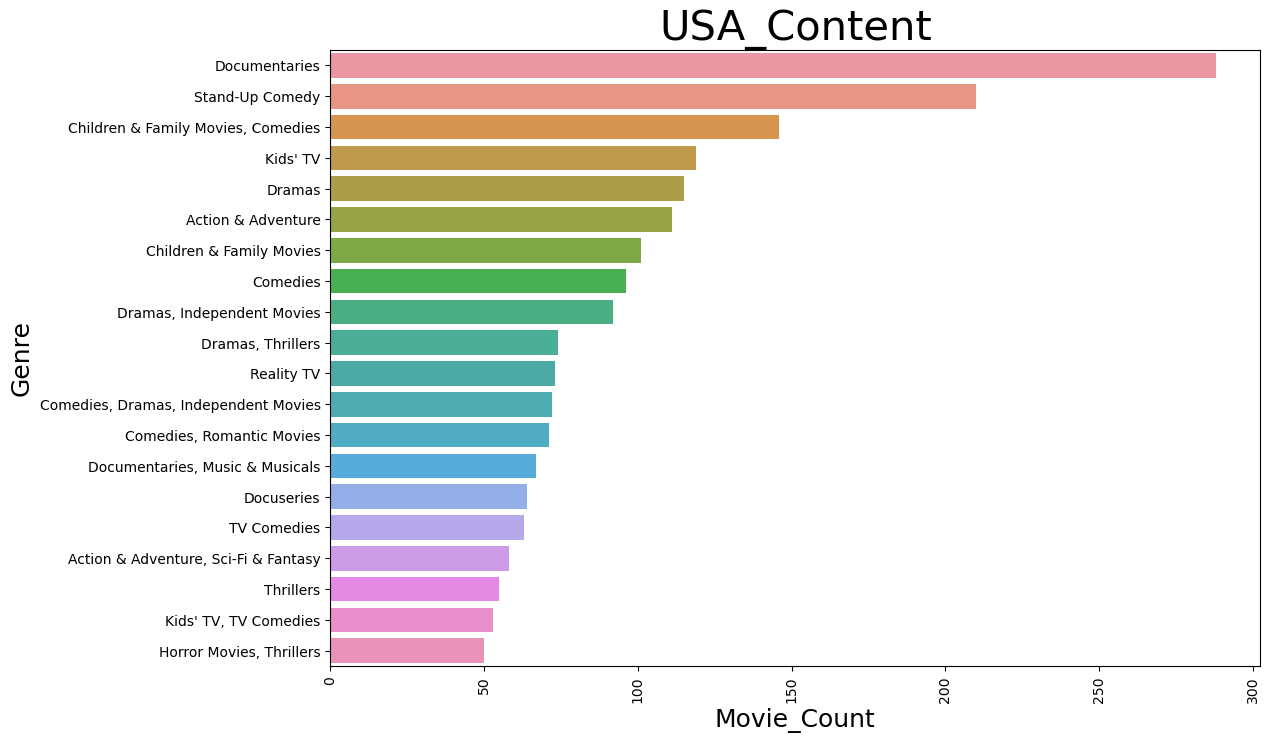

In [35]:
fig = plt.figure(figsize=(12, 8))
sns.barplot(data=Movie_content_usa, x="title",y="listed_in")
plt.xlabel("Movie_Count",fontsize=18)
plt.ylabel("Genre",fontsize=18)
plt.xticks(rotation=90)
plt.title("USA_Content",fontsize=30)
plt.show()

#India Content
1. Most popular content in india was Thrillers, dramas, comedies, Action & Adventure.
2. Least popular was sports, documentaries, kids and family movies

In [36]:
Movie_content_india_most = df[
    df["country_y"] == "India"
    ].groupby(["listed_in"]).agg({"title":"nunique"}).sort_values(by="title",ascending=False).reset_index().head(20)
Movie_content_india_most


,listed_in,title
0,"Comedies, Dramas, International Movies",124
1,"Dramas, International Movies",123
2,"Dramas, Independent Movies, International Movies",121
3,"Dramas, International Movies, Romantic Movies",64
4,"Action & Adventure, Dramas, International Movies",55
5,"Dramas, International Movies, Thrillers",44
6,"Comedies, International Movies, Romantic Movies",42
7,"Dramas, International Movies, Music & Musicals",39
8,"Comedies, International Movies, Music & Musicals",35
9,"Comedies, Dramas, Independent Movies",28


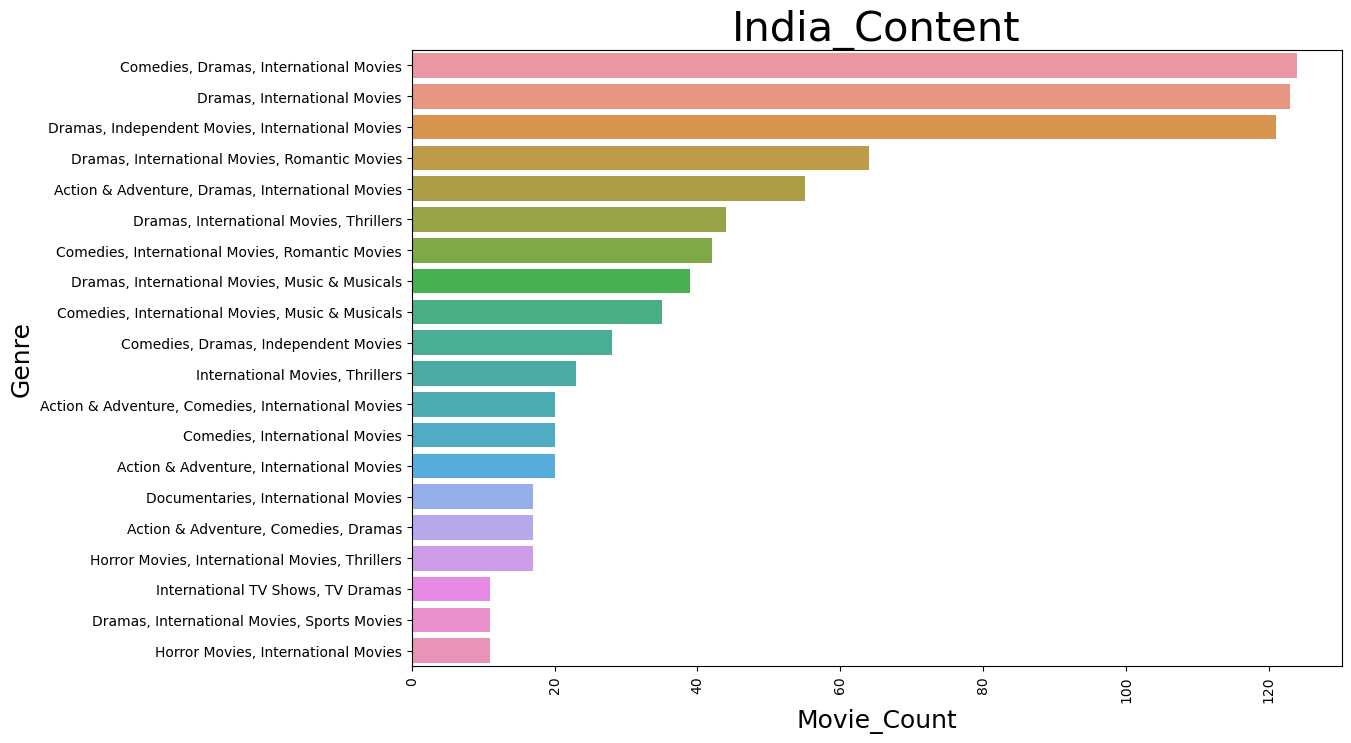

In [37]:
fig = plt.figure(figsize=(12, 8))
sns.barplot(data=Movie_content_india_most, x="title",y="listed_in")
plt.xlabel("Movie_Count",fontsize=18)
plt.ylabel("Genre",fontsize=18)
plt.xticks(rotation=90)
plt.title("India_Content",fontsize=30)
plt.show()

In [38]:
Movie_content_india_least = df[
    df["country_y"] == "India"
    ].groupby(["listed_in"]).agg({"title":"nunique"}).sort_values(by="title",ascending=False).reset_index().head(20)
Movie_content_india_least

,listed_in,title
0,"Comedies, Dramas, International Movies",124
1,"Dramas, International Movies",123
2,"Dramas, Independent Movies, International Movies",121
3,"Dramas, International Movies, Romantic Movies",64
4,"Action & Adventure, Dramas, International Movies",55
5,"Dramas, International Movies, Thrillers",44
6,"Comedies, International Movies, Romantic Movies",42
7,"Dramas, International Movies, Music & Musicals",39
8,"Comedies, International Movies, Music & Musicals",35
9,"Comedies, Dramas, Independent Movies",28


#Canada content
1. Kids Tv, family shows and documentaries are very popular in canada
2. Thrillers, Horror movies are very least popular in canada

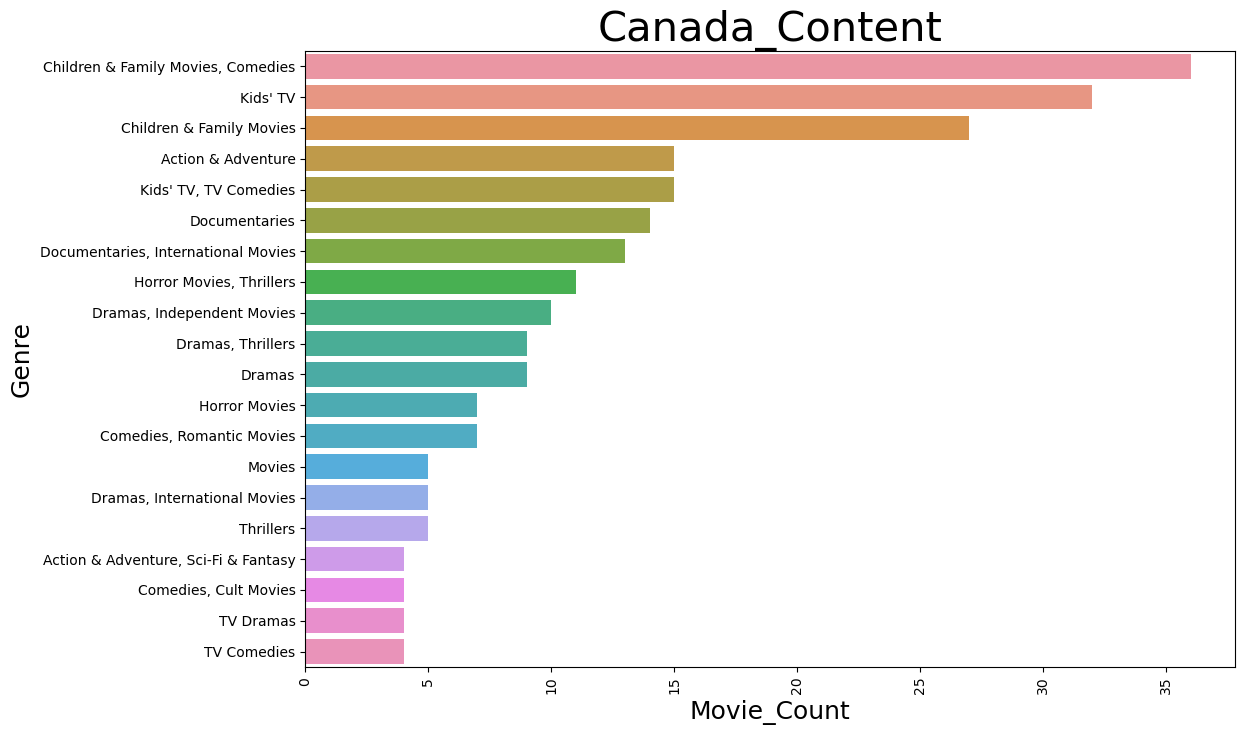

In [39]:
fig = plt.figure(figsize=(12, 8))
sns.barplot(data=df[
    df["country_y"] == "Canada"
    ].groupby(["listed_in"]).agg({"title":"nunique"}).sort_values(by="title",ascending=False).reset_index().head(20), x="title",y="listed_in")
plt.xlabel("Movie_Count",fontsize=18)
plt.ylabel("Genre",fontsize=18)
plt.xticks(rotation=90)
plt.title("Canada_Content",fontsize=30)
plt.show()

#Uk Content
1. The same like Usa but here we have less amount of movies that too most popular are documentaries and British Tv Shows
2. Action and thriller kind of movies are very less in Uk


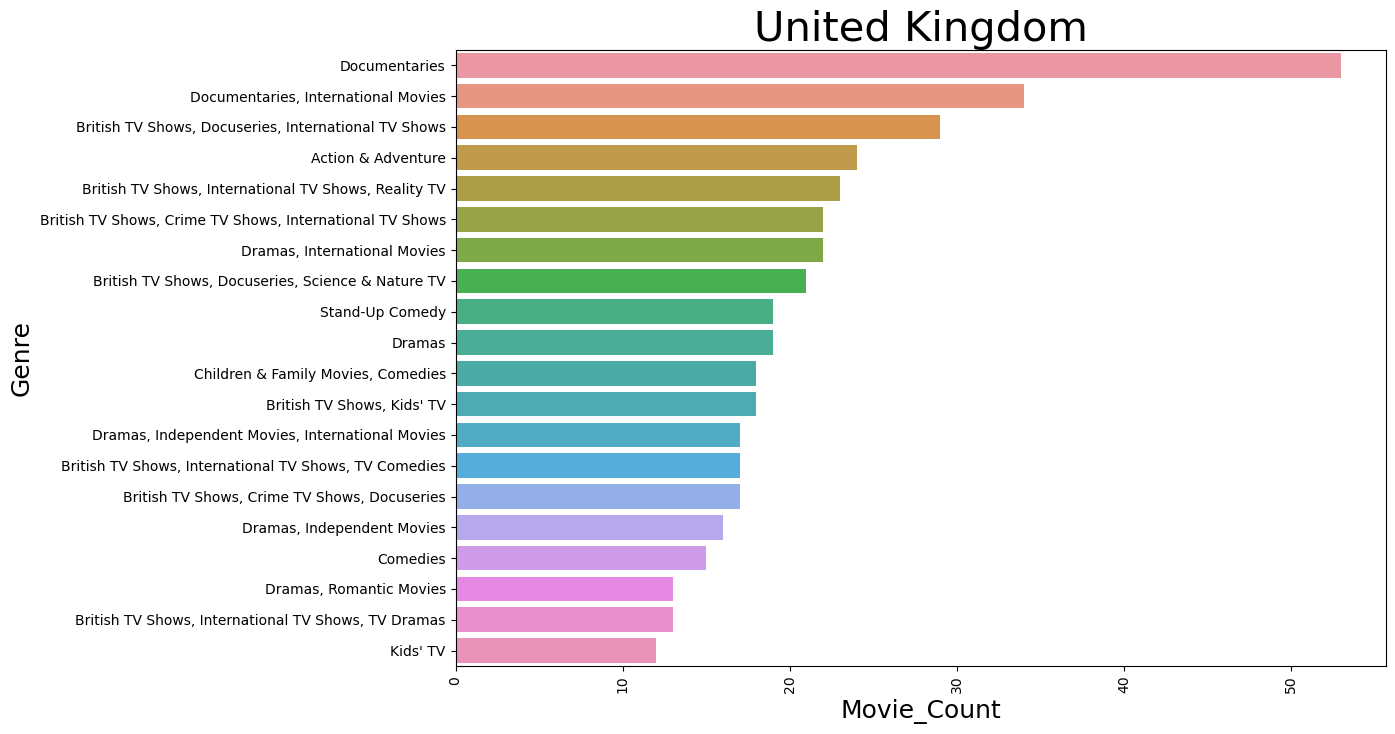

In [40]:
fig = plt.figure(figsize=(12, 8))
sns.barplot(data=df[
    df["country_y"] == "United Kingdom"
    ].groupby(["listed_in"]).agg({"title":"nunique"}).sort_values(by="title",ascending=False).reset_index().head(20), x="title",y="listed_in")
plt.xlabel("Movie_Count",fontsize=18)
plt.ylabel("Genre",fontsize=18)
plt.xticks(rotation=90)
plt.title("United Kingdom",fontsize=30)
plt.show()

# Number of movies released per year changed over the last 20-30 years

1. Lots of movies released over netflix in 2017 and 2018
2. Each year there is a consistent increase in movies and shows released.
3. Before 20 years there is not much movie released but from the past 20 years there is 20% increase over the last 20 years
4. 2017 and 2018 is the peak years for movies,
5. 2020 is the peak year for tv show
6. we can see netflix focus is more on tv show than movies, because in 2020 the movie count is less compared to tv show.


In [41]:
df["release_year"].max()-df["release_year"].min()

96

In [42]:
df.groupby(
    ["release_year","type"]
    )["title"].nunique().rename_axis(["Year_released","Movie/show"]).reset_index().sort_values(by="title",ascending=False).head(3)

,Year_released,Movie/show,title
109,2017,Movie,767
111,2018,Movie,767
107,2016,Movie,658


In [43]:
years_data = df[
    df["type"] == "Movie"
    ].groupby(
    ["release_year"]
    )["title"].nunique().rename_axis(["Year_released"]).reset_index().sort_values(by="Year_released",ascending=False).head(5)
years_data

,Year_released,title
72,2021,277
71,2020,517
70,2019,633
69,2018,767
68,2017,767


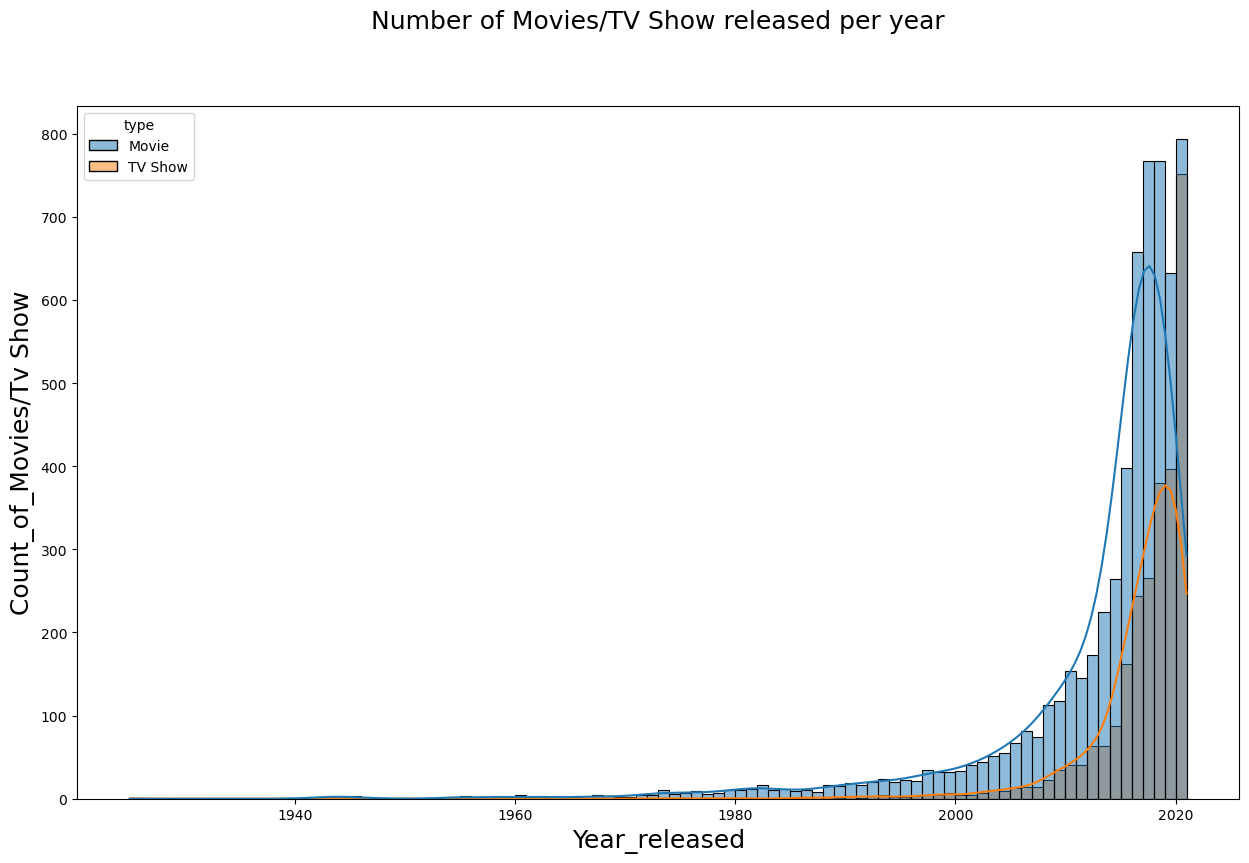

In [44]:
fig = plt.figure(figsize=(15,9))
sns.histplot(data=data.sort_values(by="release_year",ascending=False),x="release_year",hue="type",bins=96,kde=True)
plt.title("Number of Movies/TV Show released per year",y=1.1,fontsize=18,loc="center")
plt.xlabel("Year_released",fontsize=18)
plt.ylabel("Count_of_Movies/Tv Show",fontsize=18)
plt.show()

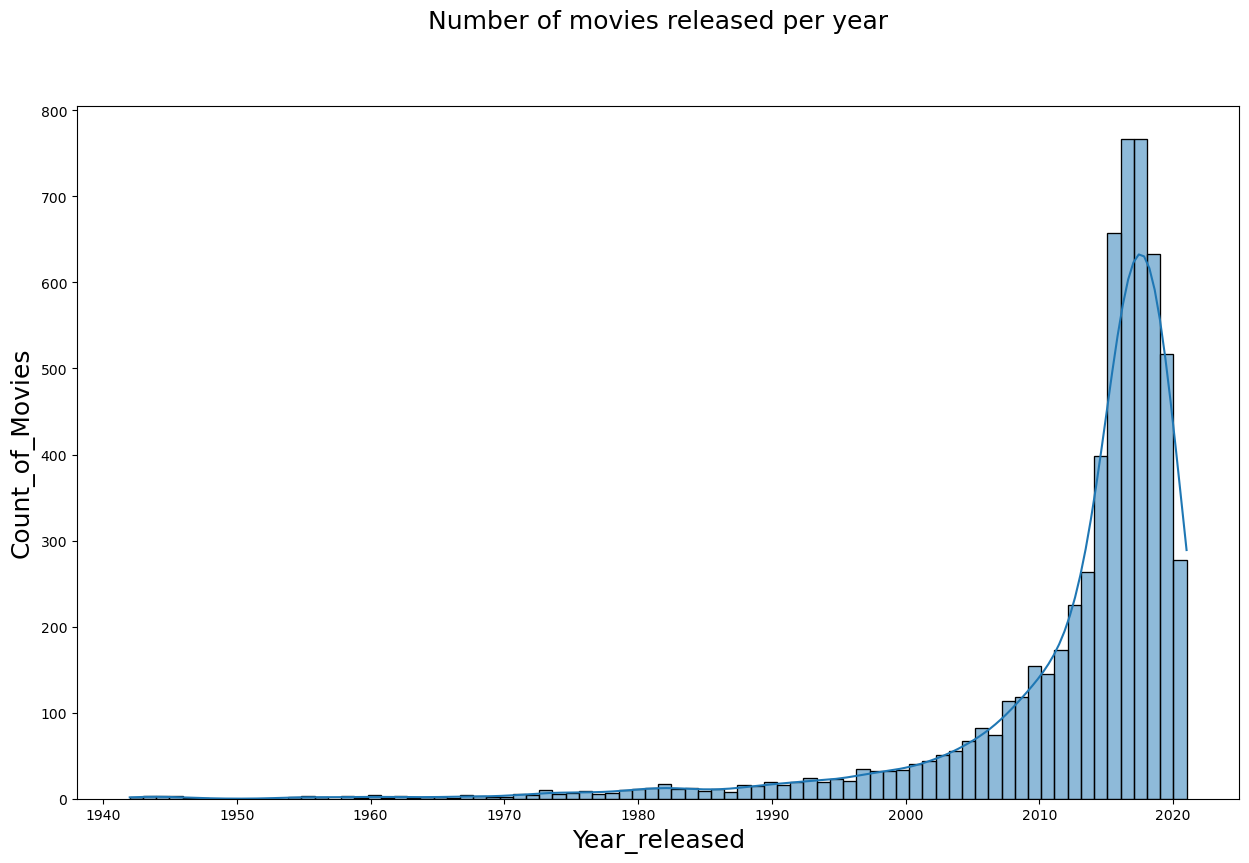

In [45]:
fig = plt.figure(figsize=(15,9))
sns.histplot(data=data[data["type"] == "Movie"].sort_values(by="release_year",ascending=False).head(8500),x="release_year",bins=80,kde=True)
plt.title("Number of movies released per year",y=1.1,fontsize=18,loc="center")
plt.xlabel("Year_released",fontsize=18)
plt.ylabel("Count_of_Movies",fontsize=18)
plt.show()

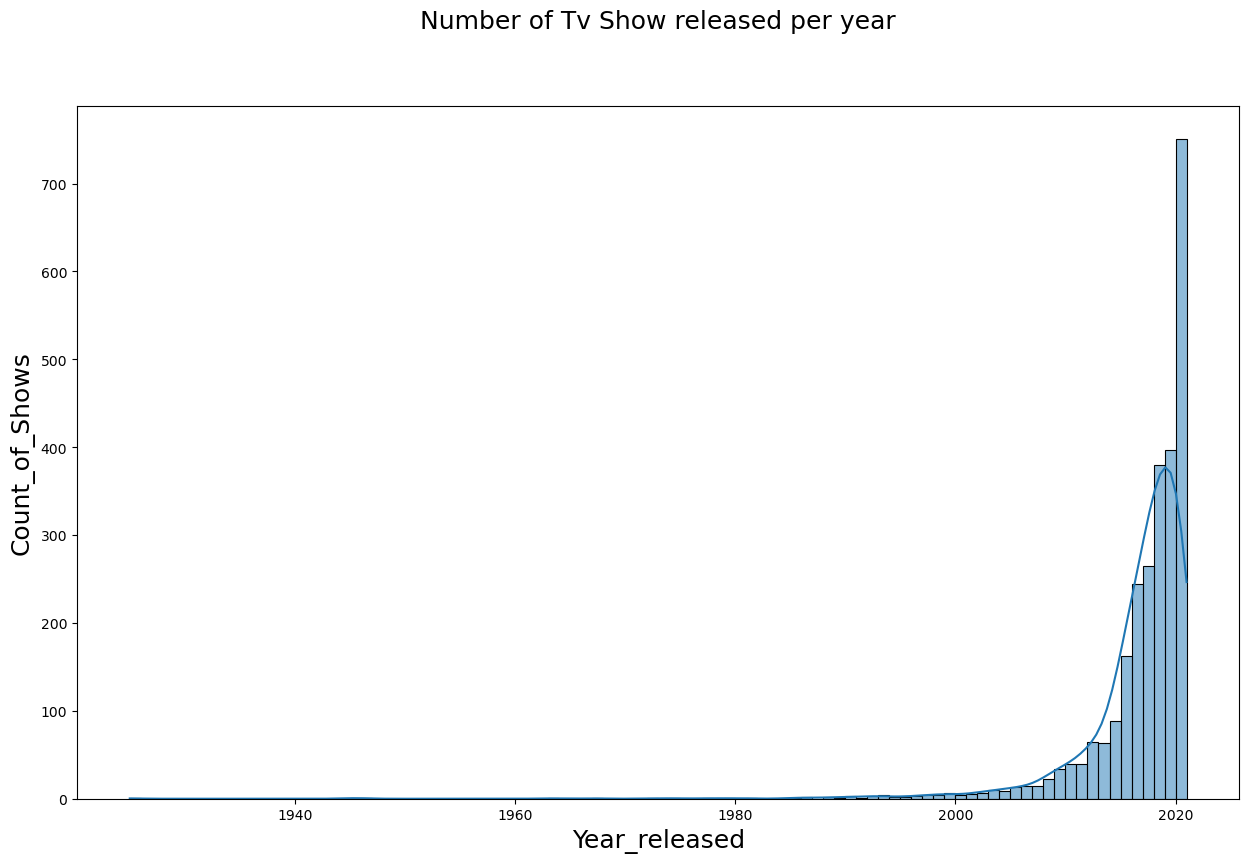

In [46]:
fig = plt.figure(figsize=(15,9))
sns.histplot(data=data[data["type"] == "TV Show"].sort_values(by="release_year",ascending=False).head(8500),x="release_year",bins=96,kde=True)
plt.title("Number of Tv Show released per year",y=1.1,fontsize=18,loc="center")
plt.xlabel("Year_released",fontsize=18)
plt.ylabel("Count_of_Shows",fontsize=18)
plt.show()

In [47]:
df.groupby(["date_added","type"]).agg({"title":"nunique"}).sort_values(by="title",ascending=False).head(30)

,,title
date_added,type,
"January 1, 2020",Movie,97
"November 1, 2019",Movie,75
"March 1, 2018",Movie,72
"December 31, 2019",Movie,67
"October 1, 2018",Movie,64
"November 1, 2018",Movie,55
"July 1, 2021",Movie,53
"October 1, 2019",Movie,51
"September 1, 2021",Movie,48


In [48]:
def clean(x):
    y = str(x).split(", ")[0].split(" ")
    return y[1] if len(y) == 2 else np.nan

In [49]:
data["date"] = data["date_added"].apply(clean)

In [50]:
data["Month"] = data["date_added"].apply(lambda x: str(x).split(", ")[0].split(" ")[0])

In [51]:
data["Year"] = data["date_added"].apply(lambda x: str(x).split(", ")[1] if len(str(x).split(", ")) == 2 else np.nan)

In [52]:
data.head(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,date,Month,Year
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",25,September,2021
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",24,September,2021
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,24,September,2021


In [53]:
data.groupby("Month").agg({"title":"nunique"}).sort_values(by="title",ascending=False)

,title
Month,
July,819
December,797
September,765
April,759
October,755
August,749
March,734
January,727
June,724


In [54]:
data.groupby("date").agg({"title":"nunique"}).sort_values(by="title",ascending=False)

,title
date,
1,2179
15,681
2,324
16,286
31,268
20,245
19,242
5,230
22,228


In [55]:
data.groupby("Year").agg({"title":"nunique"}).sort_values(by="title",ascending=False)

,title
Year,
2019,2016
2020,1879
2018,1649
2021,1498
2017,1188
2016,429
2015,82
2014,24
2011,13


# Comparison of tv shows vs. movies

1. Total shows are 8087 in that we have 6131 Movie and 2676 Tv shows.
2. Rajiv Chilaka, Raúl Campos, Jan Suter and Suhas Kadav are the top Movie directors they directed 15+ movies.
3. Alastair Fothergill, Stan Lathan, Iginio Straffi	are the top TV Show directors 
4. First three countries in movies are USA, India, UK
5. First three countries in TV Shows are USA, UK, Japan.
6. Top 3 ratings are TV-MA,TV-14,R for movies, and TV-MA,TV-14,TV-7 are of TV Shows

In [56]:
df.groupby(
    ["type"]
    )["title"].nunique().rename_axis(["Movie/show"]).reset_index().sort_values(by="title",ascending=False)

,Movie/show,title
0,Movie,6131
1,TV Show,2676


In [57]:
df.groupby(
    ["type","director"]
    )["title"].nunique().rename_axis(["Movie/show","Directors"]).reset_index().sort_values(by="title",ascending=False)


,Movie/show,Directors,title
3252,Movie,Rajiv Chilaka,19
3303,Movie,"Raúl Campos, Jan Suter",18
3885,Movie,Suhas Kadav,16
2492,Movie,Marcus Raboy,15
1716,Movie,Jay Karas,14
...,...,...,...
1687,Movie,Jasmine D'Souza,1
1688,Movie,Jason Bourque,1
1689,Movie,Jason Cohen,1
1690,Movie,Jason James,1


In [58]:
df[df["type"] == "TV Show"].groupby(
    ["type","director"]
    )["title"].nunique().rename_axis(["Movie/show","Directors"]).reset_index().sort_values(by="title",ascending=False)

,Movie/show,Directors,title
5,TV Show,Alastair Fothergill,3
194,TV Show,Stan Lathan,2
74,TV Show,Iginio Straffi,2
177,TV Show,Rob Seidenglanz,2
108,TV Show,Ken Burns,2
...,...,...,...
79,TV Show,James Bamford,1
80,TV Show,James Hawes,1
81,TV Show,James Lee,1
82,TV Show,Jan Holoubek,1


In [59]:
df.groupby(
    ["type","country_y"]
    )["title"].nunique().rename_axis(["Movie/show","country"]).reset_index().sort_values(by="title",ascending=False).head(20)

,Movie/show,country,title
114,Movie,United States,2751
43,Movie,India,962
186,TV Show,United States,938
112,Movie,United Kingdom,532
122,Movie,nan,440
189,TV Show,nan,391
20,Movie,Canada,319
34,Movie,France,303
185,TV Show,United Kingdom,272
153,TV Show,Japan,199


In [60]:
df.groupby(
    ["type","rating"]
    )["title"].nunique().rename_axis(["Movie/show","Rating"]).reset_index().sort_values(by="title",ascending=False)

,Movie/show,Rating,title
11,Movie,TV-MA,2062
9,Movie,TV-14,1427
21,TV Show,TV-MA,1145
8,Movie,R,797
19,TV Show,TV-14,733
12,Movie,TV-PG,540
7,Movie,PG-13,490
22,TV Show,TV-PG,323
6,Movie,PG,287
24,TV Show,TV-Y7,195


Text(0.5, 1.0, 'Total Number of movies based on Ratings')

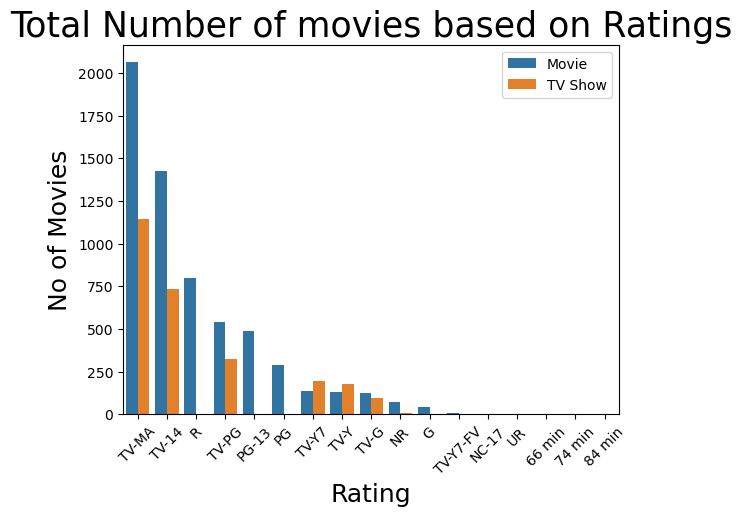

In [61]:
sns.barplot(
    data = df.groupby(
    ["type","rating"]
    )["title"].nunique().rename_axis(["Movie/show","Rating"]).reset_index().sort_values(by="title",ascending=False),
    x="Rating",
    y="title",
    hue="Movie/show"
    )
plt.xlabel("Rating",fontsize=18)
plt.xticks(rotation=45)
plt.ylabel("No of Movies",fontsize=18)
plt.legend(loc="upper right")
plt.title("Total Number of movies based on Ratings",fontsize=25)

TV-MA  -- Mature Audience       
TV-14  -- above 14    
R      -- 18+     
PG-13  -- parental guidance      
TV-PG  -- parental guidance      
PG     -- parental guidance      
TV-Y7  -- Above 7     
TV-Y   -- Between 2-6     
TV-G   -- All ages     
G      -- All ages not neccessary for children          
NR     -- Not rated(Uncut version)       
NC-17  -- 18+      
TV-Y7-FV  -- Fantasy violence     
UR      -- Not rated  

1. 83 Movies are uncut version having no rated

In [62]:
df[(df["rating"]=="NR") | (df["rating"] == "UR")].nunique()

show_id          83
type              2
title            83
director         78
date_added       69
release_year     20
rating            2
duration         48
listed_in        39
description      83
cast_y          478
country_y        26
dtype: int64

In [63]:
Tv_show = df[
    df["type"] == "TV Show"
    ].groupby("listed_in").agg({"title":"nunique"}).sort_values(by="title",ascending=False).reset_index()

#Tv Show genre

1. Romantic : 370
2. Action : 168
3. Thriller : 57
4. Comedy : 56
5. Fantasy : 84
6. Stand-Up : 56
7. Reality TV : 255

In [64]:
Tv_show[Tv_show["listed_in"].str.contains("Romantic")]["title"].sum()

370

In [65]:
Popular_genre = ["Romantic", "Action", "Thriller", "Comedy", "Fantasy","Stand-Up","Reality TV"]

In [66]:
count = []
for i in Popular_genre:
    count.append(Tv_show[Tv_show["listed_in"].str.contains(f"{i}")]["title"].sum())
    print(f"{i} :", Tv_show[Tv_show["listed_in"].str.contains(f"{i}")]["title"].sum())

Romantic : 370
Action : 168
Thriller : 57
Comedy : 56
Fantasy : 84
Stand-Up : 56
Reality TV : 255


In [67]:
Genre = pd.DataFrame({
    "genre" : Popular_genre,
    "Count" : count
})

<AxesSubplot:xlabel='genre', ylabel='Count'>

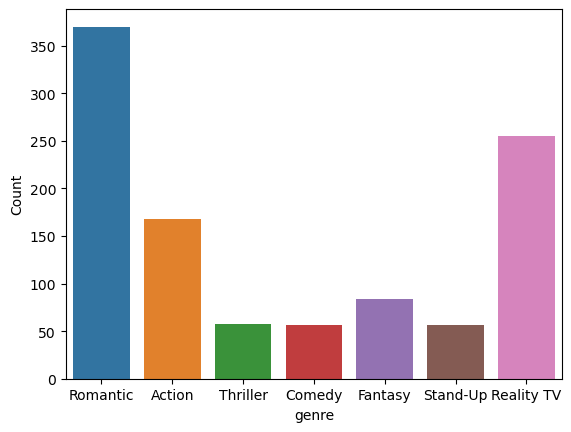

In [68]:
sns.barplot(data=Genre,x="genre",y="Count")

In [69]:
df.groupby("listed_in").agg({"title":"nunique"}).sort_values(by="title",ascending=False).iloc[30:60]

,title
listed_in,
"Comedies, Romantic Movies",80
"Action & Adventure, Comedies, International Movies",70
TV Comedies,69
"International Movies, Thrillers",67
"International TV Shows, Korean TV Shows, Romantic TV Shows",65
"Documentaries, Sports Movies",65
Thrillers,65
"Action & Adventure, Sci-Fi & Fantasy",62
"Crime TV Shows, International TV Shows, Spanish-Language TV Shows",62


# Null Values

#Null Value Findings:
1. we can't fill all the null values with mode or mean, In the data we can see most of the null value in cast are TV shows and documentaries. 
2. Similarly the director's null values are stand-up comedy shows, reality shows.
3. we can fill null values with which we have reference on existing data.

In [70]:
data.isna().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
date              98
Month              0
Year              10
dtype: int64

<AxesSubplot:xlabel='type', ylabel='count'>

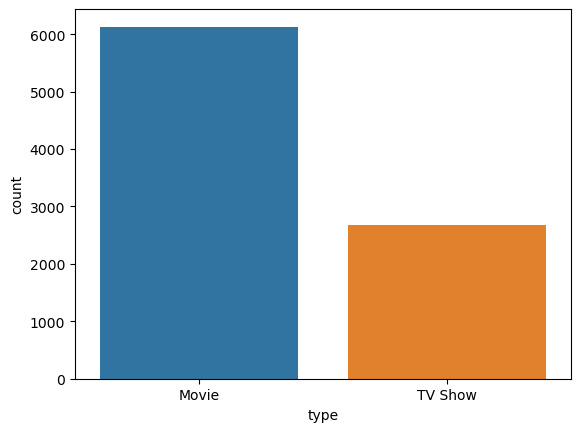

In [71]:
sns.countplot(data=data, x="type")

In [72]:
data[(data["director"].isna()) & (data["type"] == "Movie") & (data["listed_in"].str.contains("Movies"))].groupby("cast").agg({"title":"nunique"}).rename_axis(["Crew"]).reset_index().sort_values(by="title",ascending=False)

,Crew,title
44,"Michela Luci, Jamie Watson, Eric Peterson, Ann...",4
20,"David Spade, London Hughes, Fortune Feimster",3
22,Derren Brown,3
62,"Stephen Fry, Alex Marty",2
47,"Nadia Ramlee, Chio Su-Ping, Jeremy Linn, Marlo...",2
...,...,...
30,"Erin Mathews, Sam Vincent, Andrea Libman, Ashl...",1
31,"Fatih Şahin, Ece Çeşmioğlu, Halit Özgür Sarı, ...",1
32,"Fionn Whitehead, Will Poulter, Craig Parkinson...",1
33,"Harman Virk, Yuvika Chaudhry, Nirmal Rishi, Sh...",1


In [73]:
groupby_cast = data.groupby("cast",dropna=False)["director"].value_counts().rename_axis(["Crew","Director_name"]).reset_index().sort_values(by="director", ascending=False)

In [74]:
groupby_cast.isna().sum()

Crew             433
Director_name      0
director           0
dtype: int64

In [75]:
groupby_cast[groupby_cast["Crew"].isna()]["Director_name"]

5605                           Hernán Zin
5606                       Cosima Spender
5610                       Tiller Russell
5607                Orlando von Einsiedel
5608                        Prakash Satam
                      ...                
5789                          Jason Hehir
5788                          Jason Cohen
5787             Jared Hess, Tyler Measom
5786         Janet Tobias, Claus Wehlisch
6037    Álvaro Longoria, Gerardo Olivares
Name: Director_name, Length: 433, dtype: object

In [76]:
df[df["director"] == "Prakash Satam"]["cast_y"].value_counts().reset_index().sort_values(by="cast_y",ascending=False).loc[0][0]

'Sonal Kaushal'

In [77]:
df[df["director"] == "Hernán Zin"]["listed_in"].str.contains("Documentaries").max()

True

In [78]:
director = {}
for i in groupby_cast[groupby_cast["Crew"].isna()]["Director_name"]:
    if df[df["director"] == f"{i}"]["listed_in"].str.contains("Documentaries").max():
        continue
    director[i] = df[df["director"] == f"{i}"]["cast_y"].value_counts().reset_index().sort_values(by="cast_y",ascending=False).loc[0][0]
    print(df[df["director"] == f"{i}"]["cast_y"].value_counts().reset_index().sort_values(by="cast_y",ascending=False).loc[0][0])

Sonal Kaushal
Saurav Chakraborty
Jigna Bhardwaj
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
Omoni Oboli
Edgar Ramírez
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
Kohtee Aramboy
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
Sam Waterston
nan
nan
Isabelle Carré
nan
nan
nan


In [79]:
null_filled = pd.Series(director)
null_filled = null_filled.rename_axis(["director"]).reset_index()

In [80]:
null_filled

,director,0
0,Prakash Satam,Sonal Kaushal
1,Suhas Kadav,Saurav Chakraborty
2,Rajiv Chilaka,Jigna Bhardwaj
3,Momoko Kamiya,nan
4,George Ford,nan
...,...,...
56,"Julia Willoughby Nason, Jenner Furst",nan
57,Jalil Lespert,Isabelle Carré
58,"Guillermo Garcia, David Cantolla",nan
59,Jason Hehir,nan


In [81]:
null_filled = null_filled[null_filled.iloc[:,1] != "nan"]

In [82]:
null_filled

,director,0
0,Prakash Satam,Sonal Kaushal
1,Suhas Kadav,Saurav Chakraborty
2,Rajiv Chilaka,Jigna Bhardwaj
16,Omoni Oboli,Omoni Oboli
17,Olivier Megaton,Edgar Ramírez
35,Poj Arnon,Kohtee Aramboy
54,Ken Burns,Sam Waterston
57,Jalil Lespert,Isabelle Carré


In [83]:
data.isna().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
date              98
Month              0
Year              10
dtype: int64

In [84]:
data[(data["cast"].isna()) & (data["director"]=="Prakash Satam")]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,date,Month,Year
3390,s3391,Movie,Little Singham: Kaal Ki Tabaahi,Prakash Satam,NaN,NaN,"October 19, 2019",2019,TV-Y7,66 min,"Children & Family Movies, Comedies",Kaal is back – bigger and badder than ever! Ca...,19,October,2019
7317,s7318,Movie,Little Singham aur Kaal ka Mahajaal,Prakash Satam,NaN,NaN,"December 1, 2018",2018,TV-Y7-FV,68 min,"Children & Family Movies, Comedies","When Kaal, the vilest demon on earth, threaten...",1,December,2018
7319,s7320,Movie,Little Singham in London,Prakash Satam,NaN,NaN,"April 22, 2019",2019,TV-Y7,66 min,"Children & Family Movies, Comedies","Little Singham is in London to meet the queen,...",22,April,2019


In [85]:
data[
    (data["cast"].isna()) & 
    (data["director"] == "Prakash Satam")
    ].fillna(null_filled[null_filled["director"] == "Prakash Satam"].iloc[0,1])

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,date,Month,Year
3390,s3391,Movie,Little Singham: Kaal Ki Tabaahi,Prakash Satam,Sonal Kaushal,Sonal Kaushal,"October 19, 2019",2019,TV-Y7,66 min,"Children & Family Movies, Comedies",Kaal is back – bigger and badder than ever! Ca...,19,October,2019
7317,s7318,Movie,Little Singham aur Kaal ka Mahajaal,Prakash Satam,Sonal Kaushal,Sonal Kaushal,"December 1, 2018",2018,TV-Y7-FV,68 min,"Children & Family Movies, Comedies","When Kaal, the vilest demon on earth, threaten...",1,December,2018
7319,s7320,Movie,Little Singham in London,Prakash Satam,Sonal Kaushal,Sonal Kaushal,"April 22, 2019",2019,TV-Y7,66 min,"Children & Family Movies, Comedies","Little Singham is in London to meet the queen,...",22,April,2019


In [86]:
data.isna().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
date              98
Month              0
Year              10
dtype: int64

In [87]:
data.fillna(data.groupby('director',dropna=False).transform(lambda x:x.mode()),inplace=True)

In [88]:
data.isna().sum()

show_id            0
type               0
title              0
director        2634
cast             794
country          768
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
date              97
Month              0
Year              10
dtype: int64

In [89]:
data.fillna(data.groupby('cast',dropna=False).transform(lambda x:x.mode()),inplace=True)

In [90]:
data.isna().sum()

show_id            0
type               0
title              0
director        2614
cast             794
country          749
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
date              95
Month              0
Year              10
dtype: int64

# Actionable insights

1. We can see Tv Show count is increasing than Movie  in the period of 2019 to 2021, because of Pandemic period. In future if Netflix can increase their Tv show compared to Movies with the genre of Romantic,action, thriller, Fantasy.
2. Most of the movies/Tv Show in netflix are having mature audience rating, Netflix can focus on mature audience films over than children movies.
3. Mostly movies/Tv show are added to netflix in the month of july, December and in the dates of 1st and 15th. They can improve business by releasing movies on festive dates, and weekend dates.
4. Netflix can recommend based on the location of users, Because we can able to see that based on the country the genre and content of movie/Tv show is dynamically varies.
